In [1]:
import tensorflow as tf
print("Version: ", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

Version:  2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(f"Training images: {X_train.shape}")
print(f"Training labels: {Y_train.shape}")
print(f"Test images: {X_test.shape}")
print(f"Test labels: {Y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


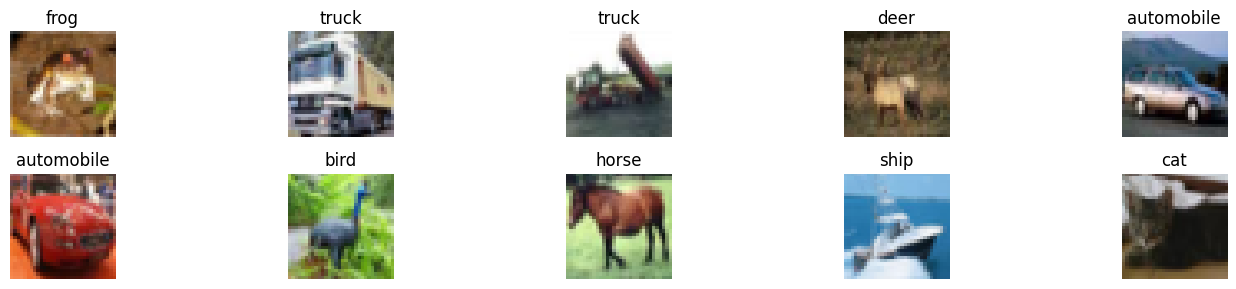

In [3]:
plt.figure(figsize=(15,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[Y_train[i][0]])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, Y_train_final, Y_val = train_test_split(X_train, Y_train, test_size=0.111, random_state=42)

X_test_final = X_test[:6000]
Y_test_final = Y_test[:6000]

print(f"Training set: {X_train_final.shape[0]} images (80%)")
print(f"Validation set: {X_val.shape[0]} images (10%)")
print(f"Testing set: {X_test_final.shape[0]} images (10%)")

Training set: 44450 images (80%)
Validation set: 5550 images (10%)
Testing set: 6000 images (10%)


In [5]:
X_train_final = X_train_final.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0
X_test_final = X_test_final.astype('float32')/255.0


Y_train_final = keras.utils.to_categorical(Y_train_final,10)
Y_val = keras.utils.to_categorical(Y_val,10)
Y_test_final = keras.utils.to_categorical(Y_test_final,10)

print("Data preprocessed and normalized")
print(f"Image shape: {X_train_final[0].shape}")
print(f"Label shape: {Y_train_final[0].shape}")

Data preprocessed and normalized
Image shape: (32, 32, 3)
Label shape: (10,)


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
print("Model compiled successfully")

Model compiled successfully


In [8]:
history = model.fit(
    X_train_final, Y_train_final,
    epochs=20,
    batch_size=64,
    validation_data=(X_val,Y_val),
    verbose=1
)
print("\n Training complete")

Epoch 1/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2423 - loss: 2.0095 - val_accuracy: 0.4550 - val_loss: 1.4971
Epoch 2/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4428 - loss: 1.5392 - val_accuracy: 0.5263 - val_loss: 1.3344
Epoch 3/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5099 - loss: 1.3699 - val_accuracy: 0.5741 - val_loss: 1.1762
Epoch 4/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5498 - loss: 1.2807 - val_accuracy: 0.5939 - val_loss: 1.1318
Epoch 5/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5755 - loss: 1.2074 - val_accuracy: 0.6128 - val_loss: 1.0731
Epoch 6/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6050 - loss: 1.1258 - val_accuracy: 0.6427 - val_loss: 1.0353
Epoch 7/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6179 - loss: 1.0910 - val_accuracy: 0.6402 - val_loss: 1.0321
Epoch 8/20
695/695 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6347 - loss: 1.0421 - val_accuracy: 0

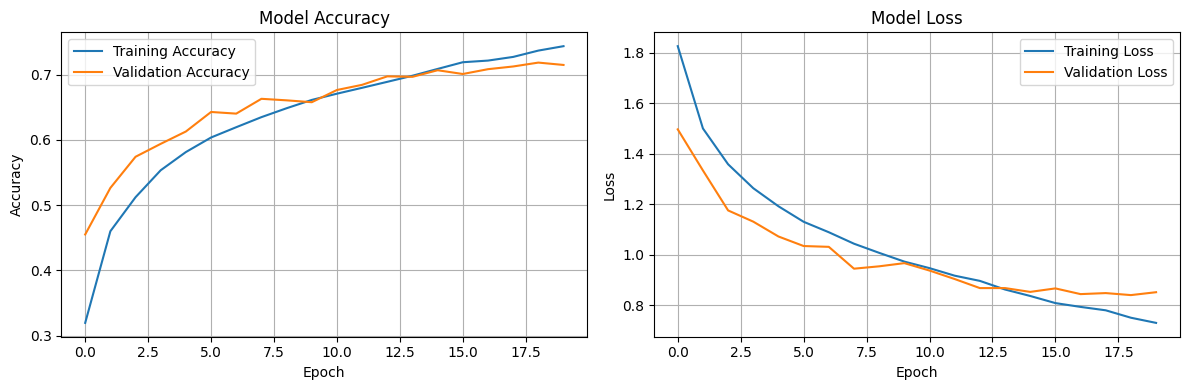

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(X_test_final, Y_test_final, verbose=0)
print(f"Final results: ")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Final results: 
Test loss: 0.8797
Test accuracy: 0.7095 (70.95%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


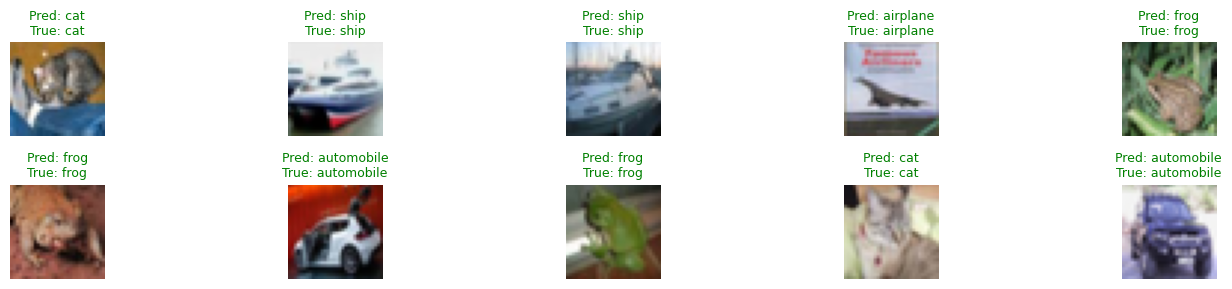

In [11]:
predictions = model.predict(X_test_final[:10])

plt.figure(figsize=(15,3))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test_final[i])

  predicted_class = np.argmax(predictions[i])
  true_class = np.argmax(Y_test_final[i])

  if predicted_class == true_class:
    color='green'
  else:
    color='red'

  plt.title(f"Pred: {class_names[predicted_class]}\nTrue: {class_names[true_class]}",
          color=color, fontsize=9)
  plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
model.save('my_cnn_model.h5')
print("Model saved as 'my_cnn_model.h5'")

Model saved as 'my_cnn_model.h5'
